In [1]:
ls

affordable_housing_2013.ipynb  thads2013n.txt*
hud_2013.csv*


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housing_2013 = pd.read_csv("hud_2013.csv")
housing_2013.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,...,'1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,...,'2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,...,'2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,...,'3 GT FMR','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','-5','-5'


In [4]:
len(housing_2013.columns)

99

In [5]:
filtered_housing = housing_2013[["AGE1", "FMR", "TOTSAL"]]
filtered_housing.head(5)

,AGE1,FMR,TOTSAL
0,82,956,0
1,50,1100,123000
2,53,1100,28000
3,67,949,0
4,26,737,96900


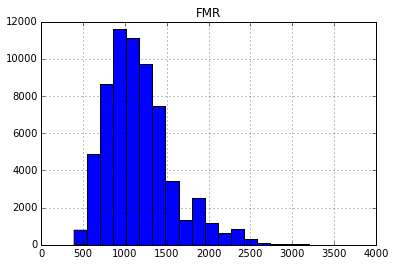

In [6]:
plt.show(filtered_housing.hist(column="FMR", bins=20))

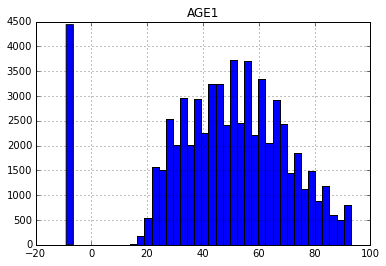

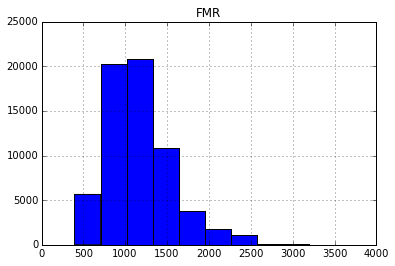

In [8]:
plt.show(filtered_housing.hist(column="AGE1", bins=40))
plt.show(filtered_housing.hist(column="FMR", bins=10))

In [11]:
eval_age1_rows = filtered_housing["AGE1"] > 0
print(eval_age1_rows.head(5))

0    True
1    True
2    True
3    True
4    True
Name: AGE1, dtype: bool


In [14]:
filtered_housing_row_selc = housing_2013[[ 'AGE1', 'BURDEN', 'FMR', 'FMTBEDRMS', 'FMTBUILT', 'TOTSAL' ]]
clean_housing = filtered_housing_row_selc[eval_age1_rows]
clean_housing.head(10)

,AGE1,BURDEN,FMR,FMTBEDRMS,FMTBUILT,TOTSAL
0,82,0.354919,956,'2 2BR','2000-2009',0
1,50,0.047527,1100,'4 4BR+','1980-1989',123000
2,53,0.602703,1100,'4 4BR+','1980-1989',28000
3,67,0.103911,949,'3 3BR','1980-1989',0
4,26,0.094019,737,'2 2BR','1980-1989',96900
5,56,0.556482,657,'1 1BR','1980-1989',15000
6,50,0.199823,988,'3 3BR','1980-1989',70001
7,26,0.366000,773,'2 2BR','1980-1989',20000
8,60,0.116584,1125,'3 3BR','1980-1989',107000
9,26,0.275074,552,'1 1BR','1980-1989',48000


In [15]:
clean_housing = clean_housing[["AGE1", "FMR", "TOTSAL"]]

In [16]:
filtered_count = len(filtered_housing)
clean_count = len(clean_housing)
print(filtered_count - clean_count)

4438


In [18]:
negative_row_numbers = clean_housing["AGE1"] < 0
negative_housing_2013 = clean_housing[negative_row_numbers]
print(len(negative_row_numbers-negative_housing_2013))

0
